<a href="https://colab.research.google.com/github/cryssoga/DSWP/blob/master/Notebook/NB15_00_CreditCard_outro%20classificador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Carregando as bibliotecas:
import pandas as pd
import numpy as np

In [5]:
# Lendo arquivo csv:
url = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Dataframes/creditcard.csv'
df_cc = pd.read_csv(url)

In [ ]:
df_cc.head()

In [ ]:
# Dimensões do dataframe:
df_cc.shape

In [ ]:
# Nome das 31 colunas do dataframe:
df_cc.columns

In [6]:
# Normalizar nomes das colunas:
df_cc.columns = df_cc.columns.str.lower()

In [ ]:
df_cc.columns

In [ ]:
# Verificando NaN
df_cc.isna().sum()

In [7]:
# Eliminando única linha com NaN:
df_cc.dropna(inplace=True)

In [ ]:
df_cc.isna().sum()

In [ ]:
# NaN eliminado, df tinha 12842 linhas e agora tem 12841 linhas
df_cc.shape

In [8]:
# Definindo variáveis globais:
i_CV = 10     # número de Cross-Validations (CV)
i_Seed = 20111974
f_Test_Size = 0.3   # Hold-Out: 30% teste, 70% treinamento

In [ ]:
# Carregando os dados para df_X e df_y:
df_cc.columns

In [ ]:
df_cc.columns[0:30]

In [ ]:
df_cc.columns[30]

In [9]:
df_X = df_cc.iloc[:,1:30]

In [ ]:
df_X

In [10]:
df_y = df_cc.iloc[:,30]

In [ ]:
df_y

In [ ]:
df_y.unique()

In [ ]:
type(df_y)

In [12]:
# Definindo amostras de treinamento e teste:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(df_X, df_y, test_size = f_Test_Size, random_state = i_Seed)

In [ ]:
X_treinamento.shape

In [ ]:
X_teste.shape

In [ ]:
y_treinamento.shape

In [ ]:
y_teste.shape

In [13]:
# Método de Machine Learning: Aprendizagem Supervisionada
# Algoritmo selecionado: Decision Tree
# Instancia (configuração do Decision Trees) com os parâmetros sugeridos para se evitar overfitting:

from sklearn.tree import DecisionTreeClassifier # Library para Decision Tree (Classificação)

ml_DT = DecisionTreeClassifier(criterion = 'gini', 
                               splitter = 'best', 
                               max_depth = None, 
                               min_samples_split = 2, 
                               min_samples_leaf = 1, 
                               min_weight_fraction_leaf = 0.0, 
                               max_features = None, 
                               random_state = i_Seed, 
                               max_leaf_nodes = None, 
                               min_impurity_decrease = 0.0, 
                               min_impurity_split = None, 
                               class_weight = None, 
                               presort = False)



In [ ]:
ml_DT

In [14]:
# Treinar o algoritmo/classificador: fit(df)
ml_DT.fit(X_treinamento, y_treinamento)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=20111974, splitter='best')

In [15]:
# Cross-Validation com k = 10 folds (= 10 partes)
i_CV=10
from sklearn.model_selection import cross_val_score # Para o CV (Cross-Validation)

# Função para Cross-Validation:

def funcao_cross_val_score(modelo, X_treinamento, y_treinamento, CV):
    
    #versão com cross_val_score:
    a_scores_CV = cross_val_score(modelo, X_treinamento, y_treinamento, cv = CV)
    print(f'Média das Acurácias calculadas pelo CV....: {100*round(a_scores_CV.mean(),4)}')
    print(f'std médio das Acurácias calculadas pelo CV: {100*round(a_scores_CV.std(),4)}')
    return a_scores_CV  # é um array com os scores a cada iteração do CV

a_scores_CV = funcao_cross_val_score(ml_DT, X_treinamento, y_treinamento, i_CV)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress thi

Média das Acurácias calculadas pelo CV....: 99.89
std médio das Acurácias calculadas pelo CV: 0.09


In [16]:
a_scores_CV

array([1.        , 0.99888765, 0.99777531, 0.99777531, 0.99888765,
       0.99888765, 1.        , 0.99888765, 0.99777283, 1.        ])

In [18]:
ml_DT.score(X_teste, y_teste)

0.998961847910719

In [33]:
# Matriz de confusão
# Fazer predições usando o classificados DecisionTree para deduzir na amostra de teste:
y_pred = ml_DT.predict(X_teste)

In [ ]:
y_pred



In [ ]:
len(y_pred)

In [ ]:
y_pred.sum()

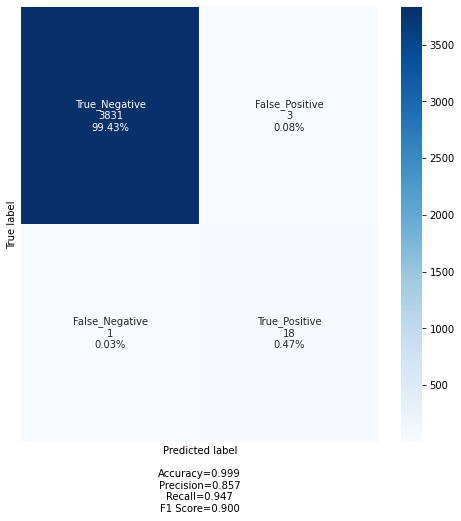

In [35]:
# completar matriz de confusão
from sklearn.metrics import confusion_matrix # para plotar a confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

def mostra_confusion_matrix(cf, 
                            group_names = None, 
                            categories = 'auto', 
                            count = True, 
                            percent = True, 
                            cbar = True, 
                            xyticks = False, 
                            xyplotlabels = True, 
                            sum_stats = True, 
                            figsize = (8, 8), 
                            cmap = 'Blues'):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
    '''

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)


cf_matrix = confusion_matrix(y_teste, y_pred)
cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
cf_categories = ['Zero', 'One']
mostra_confusion_matrix(cf_matrix, group_names= cf_labels, categories= cf_categories)

In [36]:
from sklearn.model_selection import GridSearchCV # para otimizar os parâmetros dos modelos preditivos


In [37]:
def GridSearchOptimizer(modelo, ml_Opt, d_Parametros, X_treinamento, y_treinamento, X_teste, y_teste, i_CV, l_colunas):
    ml_GridSearchCV = GridSearchCV(modelo, d_Parametros, cv = i_CV, n_jobs = -1, verbose= 10, scoring = 'accuracy')
    start = time()
    ml_GridSearchCV.fit(X_treinamento, y_treinamento)
    tempo_elapsed = time()-start
    #print(f"\nGridSearchCV levou {tempo_elapsed:.2f} segundos.")

    # Parâmetros que otimizam a classificação:
    print(f'\nParametros otimizados: {ml_GridSearchCV.best_params_}')
    
    if ml_Opt == 'ml_DT2':
        print(f'\nDecisionTreeClassifier *********************************************************************************************************')
        ml_Opt = DecisionTreeClassifier(criterion= ml_GridSearchCV.best_params_['criterion'], 
                                        max_depth= ml_GridSearchCV.best_params_['max_depth'],
                                        max_leaf_nodes= ml_GridSearchCV.best_params_['max_leaf_nodes'],
                                        min_samples_split= ml_GridSearchCV.best_params_['min_samples_leaf'],
                                        min_samples_leaf= ml_GridSearchCV.best_params_['min_samples_split'], 
                                        random_state= i_Seed)
        
    elif ml_Opt == 'ml_RF2':
        print(f'\nRandomForestClassifier *********************************************************************************************************')
        ml_Opt = RandomForestClassifier(bootstrap= ml_GridSearchCV.best_params_['bootstrap'], 
                                        max_depth= ml_GridSearchCV.best_params_['max_depth'],
                                        max_features= ml_GridSearchCV.best_params_['max_features'],
                                        min_samples_leaf= ml_GridSearchCV.best_params_['min_samples_leaf'],
                                        min_samples_split= ml_GridSearchCV.best_params_['min_samples_split'],
                                        n_estimators= ml_GridSearchCV.best_params_['n_estimators'],
                                        random_state= i_Seed)
        
    elif ml_Opt == 'ml_AB2':
        print(f'\nAdaBoostClassifier *********************************************************************************************************')
        ml_Opt = AdaBoostClassifier(algorithm='SAMME.R', 
                                    base_estimator=RandomForestClassifier(bootstrap = False, 
                                                                          max_depth = 10, 
                                                                          max_features = 'auto', 
                                                                          min_samples_leaf = 1, 
                                                                          min_samples_split = 2, 
                                                                          n_estimators = 400), 
                                    learning_rate = ml_GridSearchCV.best_params_['learning_rate'], 
                                    n_estimators = ml_GridSearchCV.best_params_['n_estimators'], 
                                    random_state = i_Seed)
        
    elif ml_Opt == 'ml_GB2':
        print(f'\nGradientBoostingClassifier *********************************************************************************************************')
        ml_Opt = GradientBoostingClassifier(learning_rate = ml_GridSearchCV.best_params_['learning_rate'], 
                                            n_estimators = ml_GridSearchCV.best_params_['n_estimators'], 
                                            max_depth = ml_GridSearchCV.best_params_['max_depth'], 
                                            min_samples_split = ml_GridSearchCV.best_params_['min_samples_split'], 
                                            min_samples_leaf = ml_GridSearchCV.best_params_['min_samples_leaf'], 
                                            max_features = ml_GridSearchCV.best_params_['max_features'])
        
    elif ml_Opt == 'ml_XGB2':
        print(f'\nXGBoostingClassifier *********************************************************************************************************')
        ml_Opt = XGBoostingClassifier(learning_rate= ml_GridSearchCV.best_params_['learning_rate'], 
                                      max_depth= ml_GridSearchCV.best_params_['max_depth'], 
                                      colsample_bytree= ml_GridSearchCV.best_params_['colsample_bytree'], 
                                      subsample= ml_GridSearchCV.best_params_['subsample'], 
                                      gamma= ml_GridSearchCV.best_params_['gamma'], 
                                      min_child_weight= ml_GridSearchCV.best_params_['min_child_weight'])
        
    # Treina novamente usando os parametros otimizados...
    ml_Opt.fit(X_treinamento, y_treinamento)

    # Cross-Validation com 10 folds
    print(f'\n********* CROSS-VALIDATION ***********')
    a_scores_CV = funcao_cross_val_score(ml_Opt, X_treinamento, y_treinamento, i_CV)

    # Faz predições com os parametros otimizados...
    y_pred = ml_Opt.predict(X_teste)
  
    # Importância das COLUNAS
    print(f'\n********* IMPORTÂNCIA DAS COLUNAS ***********')
    df_importancia_variaveis = pd.DataFrame(zip(l_colunas, ml_Opt.feature_importances_), columns= ['coluna', 'importancia'])
    df_importancia_variaveis = df_importancia_variaveis.sort_values(by= ['importancia'], ascending=False)
    print(df_importancia_variaveis)

    # Matriz de Confusão
    print(f'\n********* CONFUSION MATRIX - PARAMETER TUNNING ***********')
    cf_matrix = confusion_matrix(y_teste, y_pred)
    cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
    cf_categories = ['Zero', 'One']
    mostra_confusion_matrix(cf_matrix, group_names = cf_labels, categories = cf_categories)

    return ml_Opt, ml_GridSearchCV.best_params_


In [38]:
df_X.columns

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21',
       'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount'],
      dtype='object')

In [39]:
l_colunas = df_X.columns

In [40]:
# Dicionário de parâmetros para o parameter tunning. Ao todo serão ajustados 2X13X5X5X7= 4.550 modelos. Contando com 10 folds no Cross-Validation, então são 45.500 modelos.
d_parametros_DT= {"criterion": ["gini", "entropy"], "min_samples_split": [2, 5, 10, 30, 50, 70, 90, 120, 150, 180, 210, 240, 270, 350, 400], "max_depth": [None, 2, 5, 9, 15], "min_samples_leaf": [20, 40, 60, 80, 100], "max_leaf_nodes": [None, 2, 3, 4, 5, 10, 15]}

In [ ]:
# Invoca a função com o modelo baseline:

from time import time
ml_DT2, best_params = GridSearchOptimizer(ml_DT, 'ml_DT2', d_parametros_DT, X_treinamento, y_treinamento, X_teste, y_teste, i_CV, l_colunas)


Fitting 10 folds for each of 5250 candidates, totalling 52500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

In [ ]:
# Visualizar os resultados:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

np.set_printoptions(suppress=True)

dot_data = StringIO()
export_graphviz(ml_DT2, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = l_colunas, class_names = ['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DecisionTree.png')
Image(graph.create_png())